# Reporte Copa KC Febrero 2023

> Aquí puede acceder al reporte online picando al gif

[![](https://img.wattpad.com/ab73d746d0f0febb3fa87e8f236d96cbb14301ce/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f776174747061642d6d656469612d736572766963652f53746f7279496d6167652f457556625a62456148684e7a63513d3d2d313437312e3135663161376564353233323838636534353639363831353635362e676966)](https://deepnote.com/@luceldasilva/KC-Cup-FEB-2023-ac0e62ae-54fb-4f6c-aee5-9b37d3ae9485)

## Introducción

La Copa KC es un evento del videojuego [Yu-Gi-Oh! Duel Links](https://es.wikipedia.org/wiki/Yu-Gi-Oh!_Duel_Links) multijugador que celebra duelos contra todos los duelistas del mundo para decidir quien es el mejor.

Es un sistema de ranking que consta de 2 fases, en resumen la fase 1 recompensa gemas que son la moneda del juego y en la fase 2 da premio al 1er lugar para clasificar al mundial de yugioh pero no recompensa gemas. Por lo que la comunidad normalmente prioriza la fase 1 que te da recursos para la cuenta.

Contiene mazos que llegaron al rango ND. MAX de la comunidad hispanohablante.

## Conociendo los Datos

Recolectado de la [API de recolección de mazos](https://github.com/luceldasilva/api-kc-report-duel-links)

![](https://i.pinimg.com/originals/d6/d3/59/d6d359c3349f14efbf371d78190e5c95.gif)

| Columna | Tipo de Dato |Descripción | 
| :---: | :---: | :---: | 
| id | String | Id característico de registro en MongoDB |
| duelist | Integer | Código identificatorio universal del usuario |
| deck | String | El mazo usado |
| skill | String | La habilidad usada para el deck |
| zerotg | Boolean | Usuario perteneciente a la comunidad [ZeroTG](https://www.youtube.com/c/ZeroTG) |
| zephra | Boolean | Usuario perteneciente a la comunidad [ZephraCarl](https://www.youtube.com/c/ZephraCarl) |
| bryan | Boolean | Usuario perteneciente a la comunidad [Bryan Norén](https://www.youtube.com/c/BryanNorén) |
| ndmax | String | Fecha que llegó al rango máximo del torneo |

![](https://img.wattpad.com/b305e4b74e28e646b20687b7a76167cbe1b33eaf/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f776174747061642d6d656469612d736572766963652f53746f7279496d6167652f5048456e345972416b51395062513d3d2d3632323833343033302e313534653038353834636537316465623735323130303730323632322e676966)

In [1]:
import numpy as np
import pandas as pd
import logging
import plotly.express as px
import session_info

In [2]:
logging.basicConfig(
    format = '%(message)s', 
    level=logging.DEBUG,  
    encoding="utf-8"
    )

## Conteo de variables

In [3]:
kc_feb_23 = pd.read_json('https://xwid2p.deta.dev/kcfeb23/', orient='records')
logging.info(f'En total hubieron {kc_feb_23.shape[0]} duelistas con {kc_feb_23["deck"].nunique()} mazos distintos')

En total hubieron 389 duelistas con 82 mazos distintos


## Registro de la comunidad

Tabla de cuántos usuarios reportaron sus ndmax a los servers


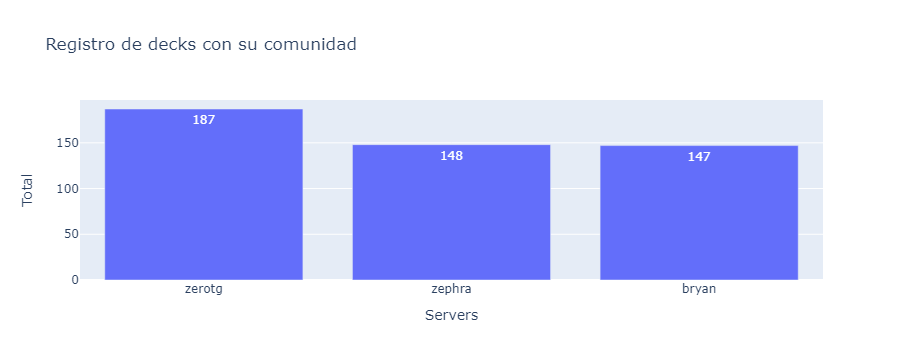

In [5]:
logging.info('Tabla de cuántos usuarios reportaron sus ndmax a los servers')

servers = kc_feb_23.iloc[:, 4:7].astype('int').sum()

comunidad_servers = pd.DataFrame(
            {
            'Servers': servers.to_dict().keys(),
            'Total': servers.to_dict().values(),
            }  
        )
fig = px.bar(comunidad_servers, y='Total', x="Servers", title="Registro de decks con su comunidad", text="Total")
fig.update_layout(showlegend=False)
fig.show()

## Ndmax por día

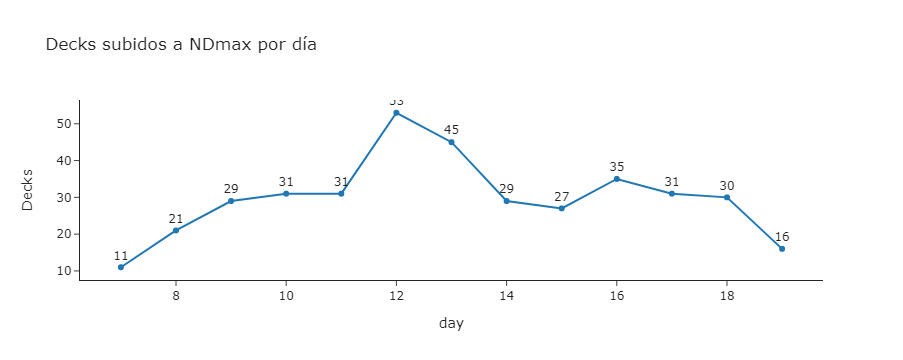

In [6]:
kc_feb_23["ndmax"] = pd.to_datetime(kc_feb_23["ndmax"], format='%d-%m-%Y')

kc_feb_23['day'] = pd.DatetimeIndex(kc_feb_23['ndmax']).day

dias = (
    kc_feb_23.groupby(['day'])['day'].count()
    .reset_index(name='Decks'))

fig = px.line(dias, x="day", y="Decks", title="Decks subidos a NDmax por día", text="Decks", template='simple_white')
fig.update_traces(textposition="top center")
fig.show()

## Top Decks Ndmax

In [7]:
logging.info('Viendo primero los top 5 mazos más usados')

decks = (
    kc_feb_23.groupby(['deck'])['deck'].count()
    .reset_index(name='total')
    .sort_values('total', ascending=0)
)

decks[0:5]

Viendo primero los top 5 mazos más usados


,deck,total
32,Gouki,50
48,Mekk-Knights,34
29,Galaxy-Eyes,29
64,Salamangreat,21
43,Madolche,19


In [8]:
logging.info('Descomponiendo en base a que skills usaron y armarlo en la gráfica')

resume = (
    kc_feb_23.groupby(['deck','skill'])['skill'].size()
    .reset_index(name='total')
    .sort_values('total', ascending=0))

gouki = resume.query("deck=='Gouki'")
mecaballero = resume.query("deck=='Mekk-Knights'")
galaxyes = resume.query("deck=='Galaxy-Eyes'")
salamangreat = resume.query("deck=='Salamangreat'")
madolche = resume.query("deck=='Madolche'")

Descomponiendo en base a que skills usaron y armarlo en la gráfica


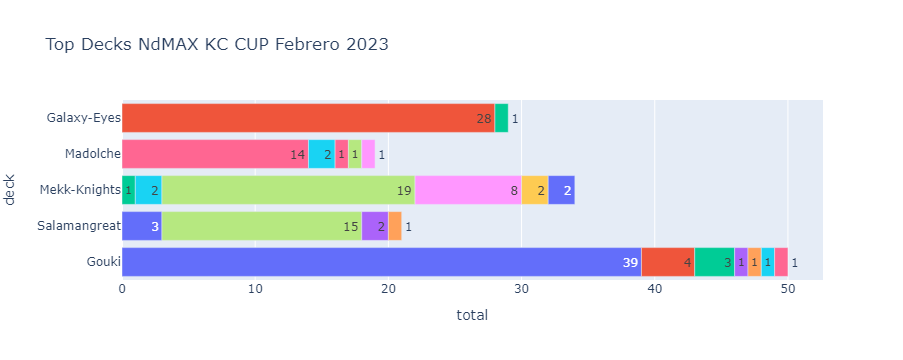

In [9]:
topfive=pd.concat([gouki, mecaballero, galaxyes, salamangreat, madolche], ignore_index=True)

fig = px.bar(topfive, y='deck', x="total", color="skill", title="Top Decks NdMAX KC CUP Febrero 2023", text="total", orientation='h')
fig.update_layout(showlegend=False)
fig.show()

Los [Goukis](https://yugioh.fandom.com/es/wiki/Gouki) fue el arquetipo que la comunidad más usó para llegar a Ndmax, es un deck de anime al igual que el [Salamangreat](https://deepnote.com/@luceldasilva/KC-Cup-NOV-2022-a6513ba3-5a62-40c2-a0cb-de6905e8e618) que lo dominó como favorito en la anterior edición.

Tiene un historial en el formato de TCG llegando a ser competitivo tanto jugando el arquetipo puro y como acelerador de jugadas mezclando con otros arquetipos que le encontraban sinergia.

Créditos a [DaniLocke](https://www.youtube.com/@DaniLocke) por dedicarle resumen al paso en el TCG y pueden verlo dando a la miniatura
[![](https://i3.ytimg.com/vi/lWOCZTcE3FM/maxresdefault.jpg)](https://youtu.be/lWOCZTcE3FM)

## Información de sesión
---